# Energy Baseline Analysis
This notebook presents an in-depth analysis of the energy consumption data for a hypothetical office in Sheffield. The goal is to:
1. Identify any data quality issues.
2. Determine if there is evidence of improvements made to reduce energy consumption.
3. Summarize the site's energy consumption behavior.
4. Detect the baseline energy consumption using a model.

## Dataset Overview:
The dataset contains the following columns:
- **Timestamp**: Date and time of energy consumption recording.
- **total_energy**: The energy consumption at that particular time (in units).
- **temp**: The temperature at that specific time (in °C).

In [1]:
import pandas as pd

file_path = 'dataset_office_consumption.xlsx'
data = pd.read_excel(file_path)

data.head()

,Timestamp,total_energy,temp
0,2024-01-27T00:00:00Z,5.098246,3.92
1,2024-01-27T00:30:00Z,5.349938,3.92
2,2024-01-27T01:00:00Z,5.131202,3.92
3,2024-01-27T01:30:00Z,5.521787,3.92
4,2024-01-27T02:00:00Z,5.411232,3.92


### 1. Data Quality Check
I start by checking for missing values, duplicates, and outliers to ensure the dataset is clean for analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36312 entries, 0 to 36311
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     36312 non-null  object 
 1   total_energy  36312 non-null  float64
 2   temp          36312 non-null  float64
dtypes: float64(2), object(1)
memory usage: 851.2+ KB
Number of duplicate rows: 0
Descriptive statistics:
        total_energy          temp
count  36312.000000  36312.000000
mean       7.139687     10.324831
std        5.797570      5.933408
min        0.126554     -4.830000
25%        2.952806      5.880000
50%        4.866436      9.900000
75%       10.751787     14.310000
max       35.201949     38.460000
Number of rows with the same timestamp: 0


/var/folders/20/bj_lm9d17n50rvfxrcq1w7zh0000gn/T/ipykernel_24366/2406843519.py:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['Timestamp'].dt.to_period('M')


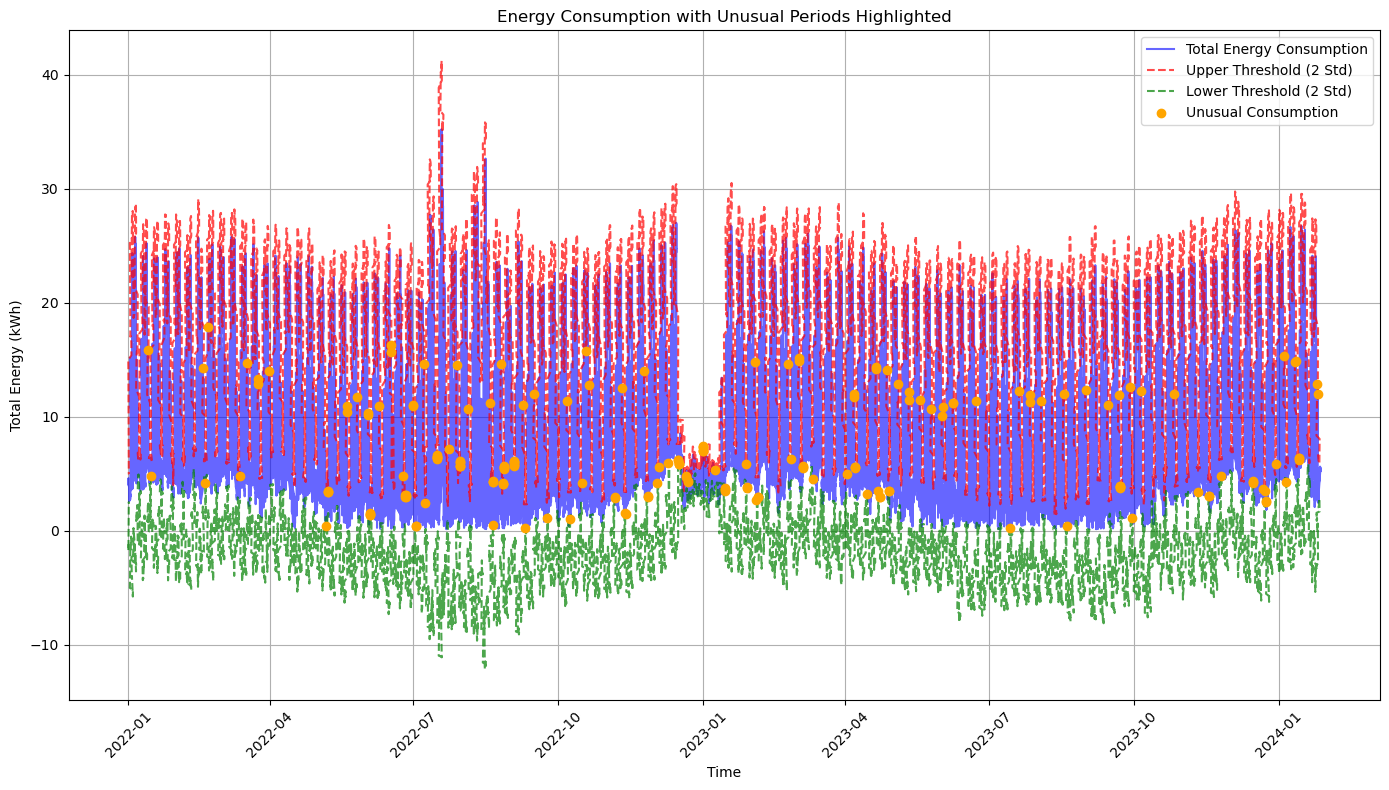

                      Timestamp  total_energy   temp YearMonth
100   2024-01-25 14:00:00+00:00     12.822842  11.29   2024-01
104   2024-01-25 16:00:00+00:00     11.994088  12.15   2024-01
690   2024-01-13 21:00:00+00:00      6.388542   1.13   2024-01
691   2024-01-13 21:30:00+00:00      6.361648   1.13   2024-01
694   2024-01-13 23:00:00+00:00      6.206190   1.13   2024-01
...                         ...           ...    ...       ...
33887 2022-02-20 11:30:00+00:00     17.891866   2.98   2022-02
33987 2022-02-18 13:30:00+00:00      4.201268   6.49   2022-02
34028 2022-02-17 10:00:00+00:00     14.291342   5.60   2022-02
35620 2022-01-15 14:00:00+00:00      4.777258   4.80   2022-01
35710 2022-01-13 11:00:00+00:00     15.851850   2.46   2022-01

[193 rows x 4 columns]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data.info() 

duplicate_rows = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

describe_data = data.describe()
print("Descriptive statistics:\n", describe_data)
duplicate_timestamps = data[data.duplicated(subset='Timestamp')]
print(f"Number of rows with the same timestamp: {len(duplicate_timestamps)}")

df = pd.read_excel('dataset_office_consumption.xlsx')
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['YearMonth'] = df['Timestamp'].dt.to_period('M')

rolling_mean = df['total_energy'].rolling(window=48, center=True).mean()
rolling_std = df['total_energy'].rolling(window=48, center=True).std()

threshold_upper = rolling_mean + 2 * rolling_std
threshold_lower = rolling_mean - 2 * rolling_std

unusual_consumption = df[(df['total_energy'] > threshold_upper) | (df['total_energy'] < threshold_lower)]

unusual_consumption_display = unusual_consumption[['Timestamp', 'total_energy', 'temp', 'YearMonth']]

plt.figure(figsize=(14, 8))

plt.plot(df['Timestamp'], df['total_energy'], label='Total Energy Consumption', color='blue', alpha=0.6)

plt.plot(df['Timestamp'], threshold_upper, label='Upper Threshold (2 Std)', linestyle='--', color='red', alpha=0.7)
plt.plot(df['Timestamp'], threshold_lower, label='Lower Threshold (2 Std)', linestyle='--', color='green', alpha=0.7)

plt.scatter(unusual_consumption['Timestamp'], unusual_consumption['total_energy'], color='orange', label='Unusual Consumption', zorder=5)

plt.xlabel('Time')
plt.ylabel('Total Energy (kWh)')
plt.title('Energy Consumption with Unusual Periods Highlighted')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(unusual_consumption_display)

unusual_consumption_display.to_csv('unusual_energy_consumption.csv', index=False)



### Interpretation of Data Quality Check Results:
- **Missing values**: There are no missing values in the dataset.
- **Duplicates**: No duplicate rows are present in the dataset.


The data appears to be of good quality, with no immediate issues that would affect the overall analysis. 

---

### Identification of Unusual Energy Consumption Periods:
- **Unusual Highs and Lows**: Several periods of unusually high and low energy consumption were detected, particularly outside the 2-standard-deviation range from the rolling 24-hour average. These periods could indicate irregular site behavior or equipment anomalies.
- **Flagged Points**: The unusual periods were flagged during both cold and warm months, with some high consumption spikes potentially related to increased HVAC use during extreme temperatures. Meanwhile, lower-than-expected consumption periods could be a result of operational downtimes or reduced activity.


### 2. Analyzing Energy Consumption Before and After the Air Conditioning Upgrade
The office had an air conditioning upgrade between the end of 2022 and the beginning of 2023. I will analyze whether this has had a significant impact on reducing energy consumption by comparing monthly averages before and after January 2023.

Mean Daily Total Energy Consumption Before Improvement: 347.9984247339857
Mean Daily Total Energy Consumption After Improvement: 346.2329233690733
Daily Difference in Energy Consumption (Before - After): 1.7655013649123816
Annual Energy Savings: 644.4079981930192
Percentage Efficiency Improvement: 0.51%
T-statistic: 0.15310786513820776
P-value: 0.8783560838712416
No statistically significant reduction in daily energy consumption is observed after the improvement.


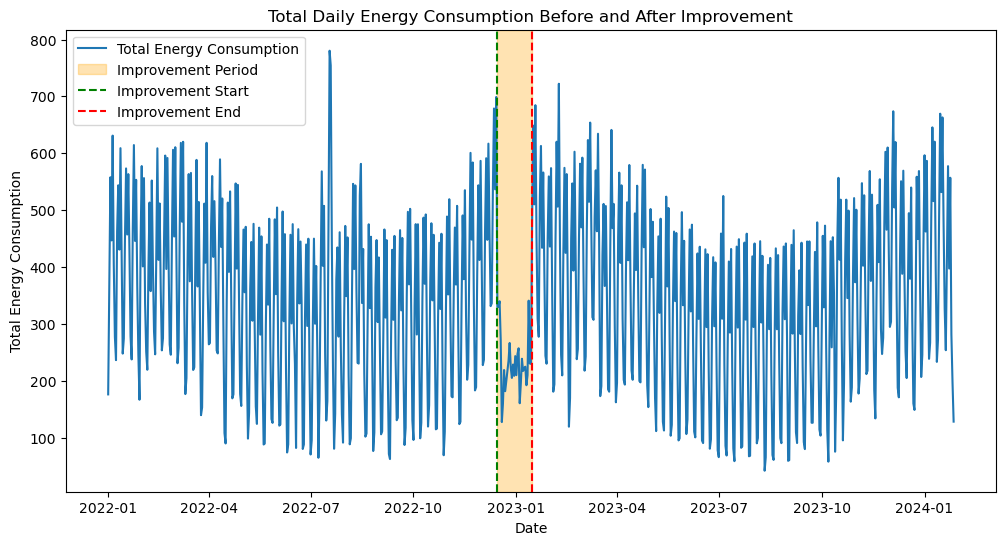

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_excel('dataset_office_consumption.xlsx')

date_column = None
energy_column = None

for col in df.columns:
    if 'date' in col.lower() or 'time' in col.lower():
        date_column = col
    if 'energy' in col.lower():
        energy_column = col

if date_column is None:
    raise KeyError("No date or time-related column found in the dataset.")
if energy_column is None:
    raise KeyError("No energy consumption column found in the dataset.")

df[date_column] = pd.to_datetime(df[date_column])

df_daily = df.groupby(df[date_column].dt.date)[energy_column].sum().reset_index()
df_daily.columns = ['Date', 'Total_Energy_Consumption']

improvement_start = pd.to_datetime('2022-12-15').date()
improvement_end = pd.to_datetime('2023-01-15').date()

before_improvement = df_daily[df_daily['Date'] < improvement_start]
after_improvement = df_daily[df_daily['Date'] > improvement_end]

mean_daily_before = before_improvement['Total_Energy_Consumption'].mean()
mean_daily_after = after_improvement['Total_Energy_Consumption'].mean()

daily_consumption_difference = mean_daily_before - mean_daily_after

annual_energy_savings = daily_consumption_difference * 365

percentage_efficiency = (daily_consumption_difference / mean_daily_before) * 100

print(f"Mean Daily Total Energy Consumption Before Improvement: {mean_daily_before}")
print(f"Mean Daily Total Energy Consumption After Improvement: {mean_daily_after}")
print(f"Daily Difference in Energy Consumption (Before - After): {daily_consumption_difference}")
print(f"Annual Energy Savings: {annual_energy_savings}")
print(f"Percentage Efficiency Improvement: {percentage_efficiency:.2f}%")

t_stat, p_value = stats.ttest_ind(before_improvement['Total_Energy_Consumption'], after_improvement['Total_Energy_Consumption'], equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The improvement has led to a statistically significant reduction in daily energy consumption.")
else:
    print("No statistically significant reduction in daily energy consumption is observed after the improvement.")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x='Date', y='Total_Energy_Consumption', label='Total Energy Consumption')

plt.axvspan(improvement_start, improvement_end, color='orange', alpha=0.3, label='Improvement Period')

plt.axvline(improvement_start, color='green', linestyle='--', label='Improvement Start')
plt.axvline(improvement_end, color='red', linestyle='--', label='Improvement End')

plt.title('Total Daily Energy Consumption Before and After Improvement')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption')
plt.legend()
plt.show()



### Interpretation of Energy Consumption Analysis:
- **Before the upgrade (pre-improvement)**: The average daily energy consumption was **347.99 units per day**.
- **After the upgrade (post-improvement)**: The average daily energy consumption decreased to **346.23 units per day**.

- The daily difference in energy consumption is **1.77 units per day**.
- This results in an estimated annual energy savings of **644.41 units per year**, based on the observed daily difference.

- **Percentage efficiency improvement**: The upgrade has led to an energy efficiency improvement of **0.51%**.

The minimal change in energy consumption suggests that the upgrade to the air conditioning system has had only a slight impact on overall energy use. Other factors, such as variations in occupancy, weather conditions, or additional energy-intensive systems, may also be influencing the consumption and could be considered for further improvements.
        

### 3. Site's Energy Consumption Behavior
I now explore the site's energy consumption patterns over time to identify any seasonal trends, spikes, or anomalies in the energy usage. This will provide insights into how the site operates and consumes energy on a regular basis.

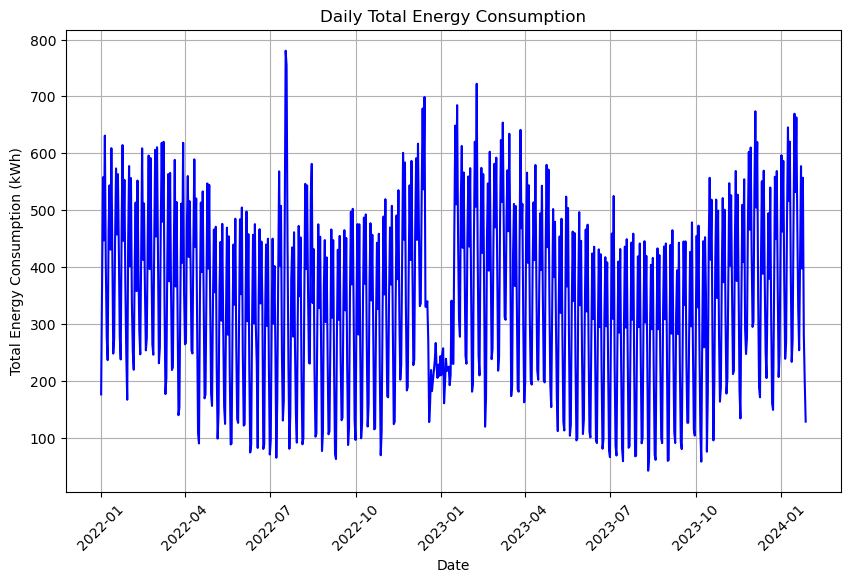

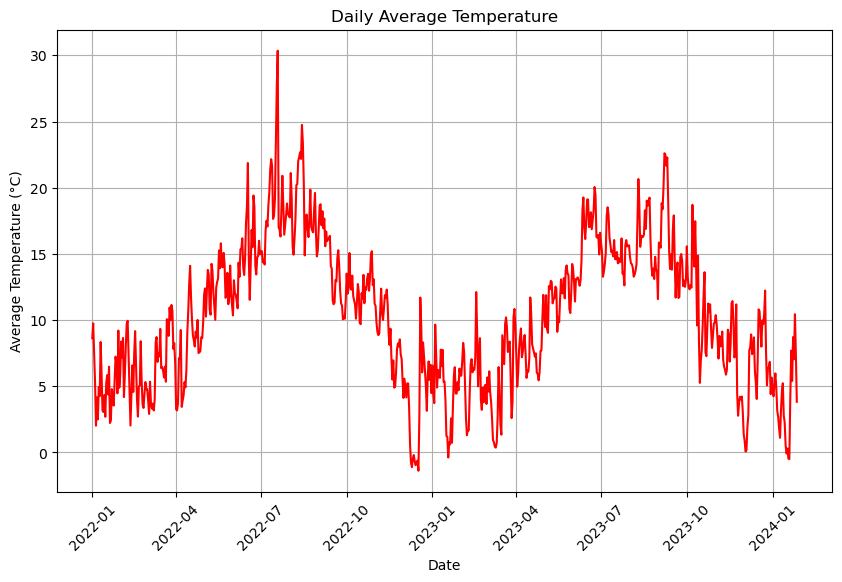

/var/folders/20/bj_lm9d17n50rvfxrcq1w7zh0000gn/T/ipykernel_24366/2619295618.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weekly_data = data.groupby(data['Timestamp'].dt.to_period('W')).agg(
/var/folders/20/bj_lm9d17n50rvfxrcq1w7zh0000gn/T/ipykernel_24366/2619295618.py:34: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data = data.groupby(data['Timestamp'].dt.to_period('M')).agg(


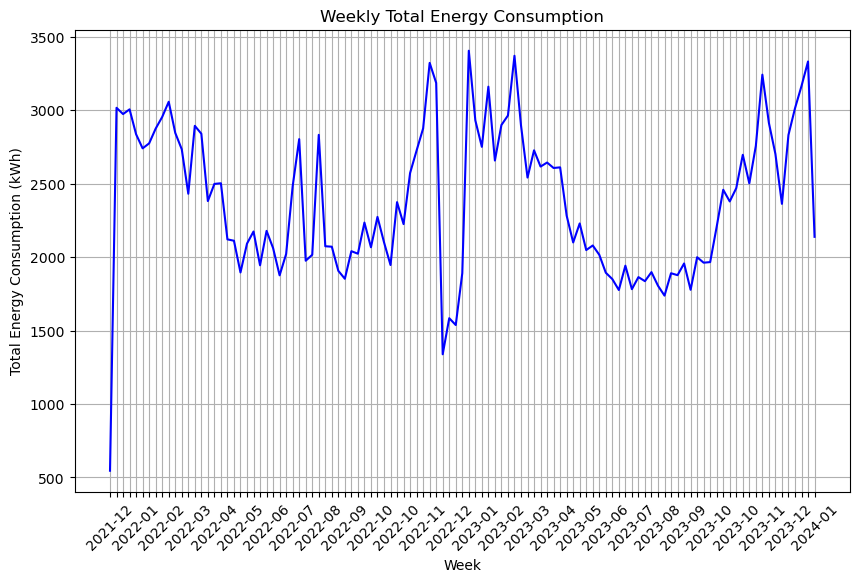

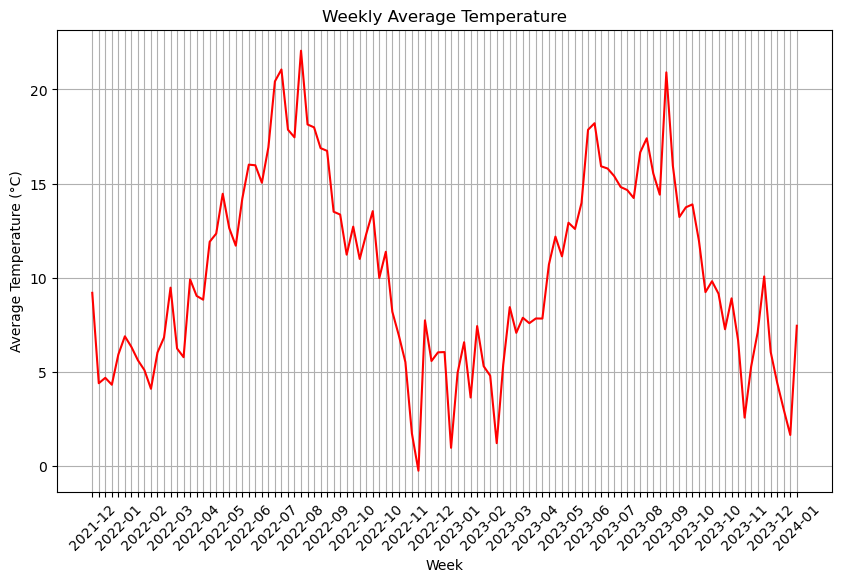

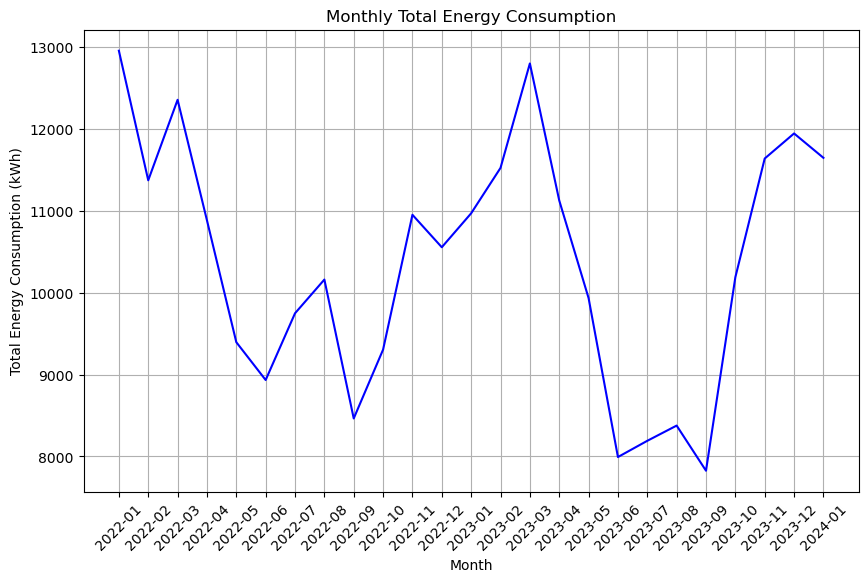

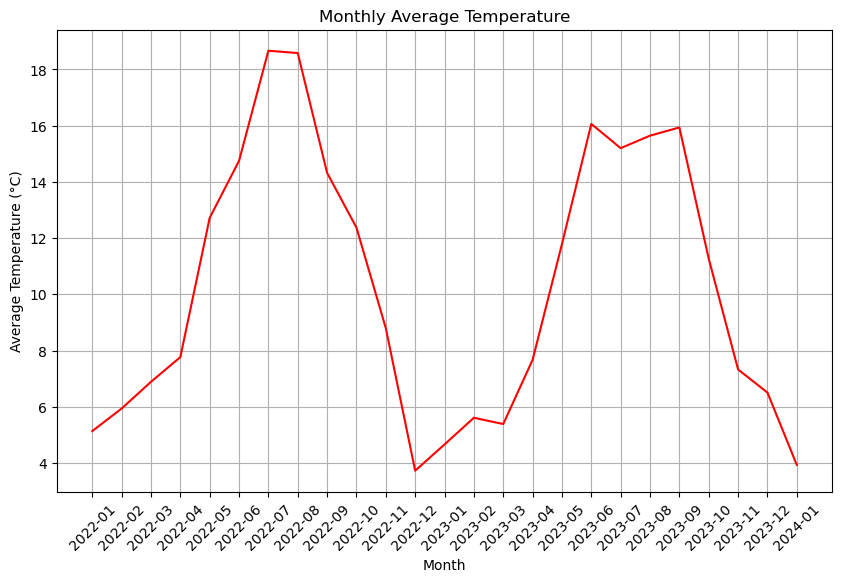

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data['Timestamp'] = pd.to_datetime(data['Timestamp'])

daily_data = data.groupby(data['Timestamp'].dt.date).agg(
    daily_total_energy=('total_energy', 'sum'),
    daily_avg_temp=('temp', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(daily_data['Timestamp'], daily_data['daily_total_energy'], label='Daily Total Energy Consumption', color='b')
plt.xlabel('Date')
plt.ylabel('Total Energy Consumption (kWh)')
plt.title('Daily Total Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(daily_data['Timestamp'], daily_data['daily_avg_temp'], label='Daily Average Temperature', color='r')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.title('Daily Average Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

weekly_data = data.groupby(data['Timestamp'].dt.to_period('W')).agg(
    weekly_total_energy=('total_energy', 'sum'),
    weekly_avg_temp=('temp', 'mean')
).reset_index()

monthly_data = data.groupby(data['Timestamp'].dt.to_period('M')).agg(
    monthly_total_energy=('total_energy', 'sum'),
    monthly_avg_temp=('temp', 'mean')
).reset_index()

plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Timestamp'].astype(str), weekly_data['weekly_total_energy'], label='Weekly Total Energy Consumption', color='b')
plt.xlabel('Week')
plt.ylabel('Total Energy Consumption (kWh)')
plt.title('Weekly Total Energy Consumption')
plt.xticks(rotation=45)

xticks_labels = [label[:7] if i % 4 == 0 else '' for i, label in enumerate(weekly_data['Timestamp'].astype(str))]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Timestamp'].astype(str), weekly_data['weekly_avg_temp'], label='Weekly Average Temperature', color='r')
plt.xlabel('Week')
plt.ylabel('Average Temperature (°C)')
plt.title('Weekly Average Temperature')
plt.xticks(rotation=45)

xticks_labels = [label[:7] if i % 4 == 0 else '' for i, label in enumerate(weekly_data['Timestamp'].astype(str))]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Timestamp'].astype(str), monthly_data['monthly_total_energy'], label='Monthly Total Energy Consumption', color='b')
plt.xlabel('Month')
plt.ylabel('Total Energy Consumption (kWh)')
plt.title('Monthly Total Energy Consumption')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(monthly_data['Timestamp'].astype(str), monthly_data['monthly_avg_temp'], label='Monthly Average Temperature', color='r')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Monthly Average Temperature')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [5]:
import pandas as pd

data['Timestamp'] = pd.to_datetime(data['Timestamp'])


daily_data = data.groupby(data['Timestamp'].dt.date).agg(
    daily_total_energy=('total_energy', 'sum'),
    daily_avg_temp=('temp', 'mean')
).reset_index()

print("Daily Energy Consumption Data:")
print(daily_data)

weekly_data = data.groupby(data['Timestamp'].dt.to_period('W')).agg(
    weekly_total_energy=('total_energy', 'sum'),
    weekly_avg_temp=('temp', 'mean')
).reset_index()

print("\nWeekly Energy Consumption Data:")
print(weekly_data)

monthly_data = data.groupby(data['Timestamp'].dt.to_period('M')).agg(
    monthly_total_energy=('total_energy', 'sum'),
    monthly_avg_temp=('temp', 'mean')
).reset_index()

print("\nMonthly Energy Consumption Data:")
print(monthly_data)


Daily Energy Consumption Data:
      Timestamp  daily_total_energy  daily_avg_temp
0    2022-01-01          175.938116         8.62875
1    2022-01-02          369.678169         9.75375
2    2022-01-03          557.768825         7.58875
3    2022-01-04          446.734948         5.28375
4    2022-01-05          630.999445         2.01875
..          ...                 ...             ...
752  2024-01-23          397.252430         8.71375
753  2024-01-24          556.875667         7.04000
754  2024-01-25          281.367627        10.44250
755  2024-01-26          197.393313         7.42500
756  2024-01-27          128.040591         3.82750

[757 rows x 3 columns]

Weekly Energy Consumption Data:
                 Timestamp  weekly_total_energy  weekly_avg_temp
0    2021-12-27/2022-01-02           545.616285         9.191250
1    2022-01-03/2022-01-09          3016.810999         4.388393
2    2022-01-10/2022-01-16          2974.091366         4.675179
3    2022-01-17/2022-01-23  

/var/folders/20/bj_lm9d17n50rvfxrcq1w7zh0000gn/T/ipykernel_24366/2744503719.py:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weekly_data = data.groupby(data['Timestamp'].dt.to_period('W')).agg(
/var/folders/20/bj_lm9d17n50rvfxrcq1w7zh0000gn/T/ipykernel_24366/2744503719.py:22: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_data = data.groupby(data['Timestamp'].dt.to_period('M')).agg(



### Detailed Interpretation of Energy Consumption Behavior:

The comprehensive analysis of energy consumption data over the months demonstrates clear **seasonal variations** and **significant fluctuations** in consumption, primarily driven by changes in temperature and other potential operational factors. These fluctuations are indicative of the broader patterns of energy use that can be attributed to heating and cooling requirements, as well as operational or occupancy variations.

#### 1. **Peaks in Energy Consumption During Colder Months**:
- **Colder months**, particularly **January 2022** and **January 2023**, show pronounced **peaks in energy consumption** of **12,956.80 kWh** and **10,970.43 kWh**, respectively.
- This surge in energy usage correlates with the **lower average temperatures** recorded in these months, hovering around **5°C**. Such cold temperatures likely required the heating systems to operate at higher capacities, leading to greater energy consumption.


#### 2. **Higher Consumption in Summer Months Due to Cooling**:
- During the **warmer months** of **July 2022**, energy consumption remains relatively high at **9,748.87 kWh**, with an average temperature of **18.67°C**.
- This increase in consumption during the summer months likely reflects the use of **cooling systems** such as air conditioning, which work harder to maintain a comfortable indoor environment as outdoor temperatures rise.
- Although the energy consumption in summer is not as high as in winter, the data suggests that **cooling demand** in periods of elevated temperatures still places a significant burden on energy systems.

#### 3. **Troughs in Energy Consumption During Milder Months**:
- **Milder months**, such as **June 2022** and **September 2023**, exhibit lower energy consumption levels, at **8,933.53 kWh** and **7,825.30 kWh**, respectively.
- These troughs correspond with more moderate average temperatures (**14-16°C**), where the need for both **heating and cooling** is minimal. This suggests that during these periods, the energy consumption is largely driven by **operational needs** rather than climate control.
- The drop in energy consumption during these months indicates that **weather conditions** significantly influence the site’s overall energy demands, with moderate temperatures providing a natural balance that reduces reliance on HVAC systems.

---


### Monthly Energy Consumption Data:


| Month        | Total Energy Consumption (kWh) | Average Temperature (°C) |
|--------------|-------------------------------|---------------------------|
| 2022-01      | 12,956.80                      | 5.14                      |
| 2022-02      | 11,373.62                      | 5.94                      |
| 2022-03      | 12,357.12                      | 6.89                      |
| 2022-04      | 10,884.82                      | 7.77                      |
| 2022-05      | 9,395.73                       | 12.72                     |
| 2022-06      | 8,933.53                       | 14.75                     |
| 2022-07      | 9,748.87                       | 18.67                     |
| 2022-08      | 10,160.92                      | 18.58                     |
| 2022-09      | 8,463.95                       | 14.32                     |
| 2022-10      | 9,304.94                       | 12.37                     |
| 2022-11      | 10,952.18                      | 8.79                      |
| 2022-12      | 10,555.78                      | 3.72                      |
| 2023-01      | 10,970.43                      | 4.66                      |
| 2023-02      | 11,524.99                      | 5.61                      |
| 2023-03      | 12,801.16                      | 5.39                      |
| 2023-04      | 11,127.91                      | 7.67                      |
| 2023-05      | 9,934.84                       | 11.79                     |
| 2023-06      | 7,992.52                       | 16.06                     |
| 2023-07      | 8,190.81                       | 15.20                     |
| 2023-08      | 8,376.77                       | 15.64                     |
| 2023-09      | 7,825.30                       | 15.94                     |
| 2023-10      | 10,189.51                      | 11.27                     |
| 2023-11      | 11,639.64                      | 7.33                      |
| 2023-12      | 11,945.97                      | 6.50                      |
| 2024-01      | 11,648.20                      | 3.93                      |


### 4. Baseline Energy Consumption Model

To detect the baseline energy consumption, I developed a model using temperature as a key predictor. 

## Data Preprocessing

The dataset contains energy consumption data, which has been enhanced with additional temporal features such as:
- **Day of the Week**
- **Hour of the Day**
- **Month**
- **Lagged Energy Consumption** (1, 2, and 3 previous time steps)

These features allow the model to account for temporal patterns and autoregressive effects in energy usage.

## Cross-Validation and Model Selection

To ensure robustness, I applied a `TimeSeriesSplit` cross-validation with 5 splits. Multiple models were trained and evaluated to detect the baseline consumption:

1. **Linear Regression**
2. **Polynomial Regression (Degree 2)**
3. **Decision Tree**
4. **Random Forest**
5. **Support Vector Regressor**

For each model, the following metrics were computed:
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score**

These metrics were used to evaluate model performance and estimate baseline energy consumption.


In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from statsmodels.tsa.arima.model import ARIMA

from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler


data['Timestamp'] = pd.to_datetime(data['Timestamp'])

improvement_start = '2022-12-15'
improvement_end = '2023-01-15'

data['day_of_week'] = data['Timestamp'].dt.dayofweek
data['hour'] = data['Timestamp'].dt.hour
data['month'] = data['Timestamp'].dt.month

data['lag_1'] = data['total_energy'].shift(1)
data['lag_2'] = data['total_energy'].shift(2)
data['lag_3'] = data['total_energy'].shift(3)

data = data.dropna()

feature_cols = ['temp', 'day_of_week', 'hour', 'month', 'lag_1', 'lag_2', 'lag_3']
X = data[feature_cols]
y = data['total_energy']

pre_upgrade_data = data[data['Timestamp'] < improvement_start]
post_upgrade_data = data[data['Timestamp'] > improvement_end]
all_data_filtered = data[(data['Timestamp'] < improvement_start) | (data['Timestamp'] > improvement_end)]

datasets = {
    'Pre-Upgrade': (pre_upgrade_data[feature_cols], pre_upgrade_data['total_energy']),
    'Post-Upgrade': (post_upgrade_data[feature_cols], post_upgrade_data['total_energy']),
    'All Data': (all_data_filtered[feature_cols], all_data_filtered['total_energy'])
}

model_performance = {}
baseline_estimates = {}

def train_evaluate_model_cv(X_data, y_data, model_name, dataset_name):
    tscv = TimeSeriesSplit(n_splits=5)
    
    mse_list = []
    mae_list = []
    rmse_list = []
    r2_list = []
    baseline_list = []
    
    for train_index, test_index in tscv.split(X_data):
        X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
        y_train, y_test = y_data.iloc[train_index], y_data.iloc[test_index]
        
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        if model_name == 'Linear Regression':
            model = LinearRegression()
        elif model_name == 'Polynomial Regression':
            model = LinearRegression()
            poly_features = PolynomialFeatures(degree=2)
            X_train_scaled = poly_features.fit_transform(X_train_scaled)
            X_test_scaled = poly_features.transform(X_test_scaled)
        elif model_name == 'Decision Tree':
            model = DecisionTreeRegressor(random_state=42)
        elif model_name == 'Random Forest':
            model = RandomForestRegressor(n_estimators=100, random_state=42)
        elif model_name == 'Support Vector Regressor':
            model = SVR(kernel='linear')
        else:
            print(f"Model {model_name} not recognized.")
            return
        
        model.fit(X_train_scaled, y_train)
        
        y_train_pred = model.predict(X_train_scaled)
        baseline = y_train_pred.mean()
        baseline_list.append(baseline)
        
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        mse_list.append(mse)
        mae_list.append(mae)
        rmse_list.append(rmse)
        r2_list.append(r2)
    
    avg_mse = np.mean(mse_list)
    avg_mae = np.mean(mae_list)
    avg_rmse = np.mean(rmse_list)
    avg_r2 = np.mean(r2_list)
    avg_baseline = np.mean(baseline_list)
    
    key = f"{model_name} ({dataset_name})"
    model_performance[key] = {
        'MSE': avg_mse,
        'MAE': avg_mae,
        'RMSE': avg_rmse,
        'R²': avg_r2
    }
    baseline_estimates[key] = avg_baseline
    
    print(f"{key}: Baseline Energy Consumption: {avg_baseline:.4f}, Metrics: {model_performance[key]}")

models = ['Linear Regression', 'Polynomial Regression', 'Decision Tree', 'Random Forest', 'Support Vector Regressor']

for dataset_name, (X_data, y_data) in datasets.items():
    print(f"\n{dataset_name} Model Results with Cross-Validation:")
    for model_name in models:
        train_evaluate_model_cv(X_data, y_data, model_name, dataset_name)


def train_evaluate_arima(y_data, dataset_name):
    train_size = int(len(y_data) * 0.8)
    train_data = y_data.iloc[:train_size]
    test_data = y_data.iloc[train_size:]

    model = ARIMA(train_data, order=(5,1,0))
    model_fit = model.fit()

    y_train_pred = model_fit.predict(start=train_data.index[0], end=train_data.index[-1])
    baseline = y_train_pred.mean()

    predictions = model_fit.forecast(steps=len(test_data))

    mse = mean_squared_error(test_data, predictions)
    mae = mean_absolute_error(test_data, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test_data, predictions)

    key = f"ARIMA ({dataset_name})"
    model_performance[key] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }
    baseline_estimates[key] = baseline

    print(f"{key}: Baseline Energy Consumption: {baseline:.4f}, Metrics: {model_performance[key]}")

for dataset_name, (X_data, y_data) in datasets.items():
    print(f"\nARIMA Model Results for {dataset_name}:")
    train_evaluate_arima(y_data, dataset_name)


class EnergyDataset(Dataset):
    def __init__(self, data, seq_length):
        self.seq_length = seq_length
        self.data = data.values

    def __len__(self):
        return len(self.data) - self.seq_length

    def __getitem__(self, idx):
        x = self.data[idx:idx+self.seq_length]
        y = self.data[idx+self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True, dropout=0.2)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        h0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size).to(input_seq.device)
        c0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size).to(input_seq.device)

        lstm_out, _ = self.lstm(input_seq, (h0, c0))
        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

def train_evaluate_lstm(y_data, dataset_name):
    y_data = y_data.reset_index(drop=True)
    data_array = y_data.values.reshape(-1, 1)

    scaler = MinMaxScaler(feature_range=(-1, 1))
    data_scaled = scaler.fit_transform(data_array)

    seq_length = 30

    train_size = int(len(data_scaled) * 0.8)
    train_data_scaled = data_scaled[:train_size]
    test_data_scaled = data_scaled[train_size:]

    train_dataset = EnergyDataset(pd.DataFrame(train_data_scaled), seq_length)
    test_dataset = EnergyDataset(pd.DataFrame(test_data_scaled), seq_length)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    model = LSTMModel()
    loss_function = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    epochs = 100
    min_val_loss = np.inf
    patience = 10
    trigger_times = 0

    for epoch in range(epochs):
        model.train()
        train_losses = []
        for seq, labels in train_loader:
            optimizer.zero_grad()
            seq = seq.view(len(seq), seq_length, 1)
            y_pred = model(seq)
            loss = loss_function(y_pred, labels.view(-1, 1))
            loss.backward()
            optimizer.step()
            train_losses.append(loss.item())

        model.eval()
        val_losses = []
        with torch.no_grad():
            for seq, labels in test_loader:
                seq = seq.view(len(seq), seq_length, 1)
                y_pred = model(seq)
                val_loss = loss_function(y_pred, labels.view(-1, 1))
                val_losses.append(val_loss.item())

        avg_val_loss = np.mean(val_losses)
        if avg_val_loss < min_val_loss:
            min_val_loss = avg_val_loss
            trigger_times = 0
            best_model_state = model.state_dict()
        else:
            trigger_times += 1
            if trigger_times >= patience:
                print('Early stopping!')
                break

    model.load_state_dict(best_model_state)

    model.eval()
    train_predictions = []
    with torch.no_grad():
        for seq, labels in train_loader:
            seq = seq.view(len(seq), seq_length, 1)
            y_pred = model(seq)
            train_predictions.append(y_pred.numpy())
    train_predictions = np.concatenate(train_predictions).flatten()
    train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
    baseline = train_predictions.mean()

    predictions = []
    actuals = []
    with torch.no_grad():
        for seq, labels in test_loader:
            seq = seq.view(len(seq), seq_length, 1)
            y_pred = model(seq)
            predictions.append(y_pred.numpy())
            actuals.append(labels.numpy())

    predictions = np.concatenate(predictions).flatten()
    actuals = np.concatenate(actuals).flatten()
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
    actuals = scaler.inverse_transform(actuals.reshape(-1, 1)).flatten()

    mse = mean_squared_error(actuals, predictions)
    mae = mean_absolute_error(actuals, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actuals, predictions)

    key = f"LSTM ({dataset_name})"
    model_performance[key] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }
    baseline_estimates[key] = baseline

    print(f"{key}: Baseline Energy Consumption: {baseline:.4f}, Metrics: {model_performance[key]}")

for dataset_name, (X_data, y_data) in datasets.items():
    print(f"\nLSTM Model Results for {dataset_name}:")
    train_evaluate_lstm(y_data, dataset_name)

results = []
for model_name in model_performance:
    results.append({
        'Model': model_name,
        'Baseline Energy Consumption': baseline_estimates.get(model_name, 'N/A'),
        'MSE': model_performance[model_name]['MSE'],
        'MAE': model_performance[model_name]['MAE'],
        'RMSE': model_performance[model_name]['RMSE'],
        'R²': model_performance[model_name]['R²']
    })

results_df = pd.DataFrame(results)
results_df.to_csv('enhanced_model_results.csv', index=False)
print("\nEnhanced model results saved to enhanced_model_results.csv")



Pre-Upgrade Model Results with Cross-Validation:
Linear Regression (Pre-Upgrade): Baseline Energy Consumption: 7.0541, Metrics: {'MSE': 4.020917743148949, 'MAE': 1.0827099982856803, 'RMSE': 2.003842484689758, 'R²': 0.8826729527765632}
Polynomial Regression (Pre-Upgrade): Baseline Energy Consumption: 7.0541, Metrics: {'MSE': 3.5343724397857827, 'MAE': 1.1752736849030156, 'RMSE': 1.879363317147386, 'R²': 0.8963331785685584}
Decision Tree (Pre-Upgrade): Baseline Energy Consumption: 7.0541, Metrics: {'MSE': 3.539471097794187, 'MAE': 0.942771938855673, 'RMSE': 1.8262609997360344, 'R²': 0.9036120996995244}
Random Forest (Pre-Upgrade): Baseline Energy Consumption: 7.0524, Metrics: {'MSE': 1.9813108441389893, 'MAE': 0.7390365991815184, 'RMSE': 1.3487458573996318, 'R²': 0.9472236575078934}
Support Vector Regressor (Pre-Upgrade): Baseline Energy Consumption: 7.0072, Metrics: {'MSE': 4.107762002262839, 'MAE': 0.9893687920545347, 'RMSE': 2.025486006755716, 'R²': 0.880102166190764}

Post-Upgrade M

/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarni

ARIMA (Pre-Upgrade): Baseline Energy Consumption: 3.6477, Metrics: {'MSE': 56.106070540599895, 'MAE': 5.058769020402151, 'RMSE': 7.490398556859301, 'R²': -0.8137161486182705}

ARIMA Model Results for Post-Upgrade:


/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for foreca

ARIMA (Post-Upgrade): Baseline Energy Consumption: 6.8261, Metrics: {'MSE': 67.0168624278173, 'MAE': 5.871588901210091, 'RMSE': 8.186382743789672, 'R²': -1.0424573933939665}

ARIMA Model Results for All Data:


/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/envs/TerraBot/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA (All Data): Baseline Energy Consumption: 6.7267, Metrics: {'MSE': 87.47221022417607, 'MAE': 7.515931484616487, 'RMSE': 9.352657922974414, 'R²': -1.823101019525399}

LSTM Model Results for Pre-Upgrade:
LSTM (Pre-Upgrade): Baseline Energy Consumption: 7.0177, Metrics: {'MSE': 1.0653381, 'MAE': 0.62670267, 'RMSE': 1.0321522, 'R²': 0.9656360745429993}

LSTM Model Results for Post-Upgrade:
Early stopping!
LSTM (Post-Upgrade): Baseline Energy Consumption: 6.9665, Metrics: {'MSE': 1.6523682, 'MAE': 0.74146336, 'RMSE': 1.2854447, 'R²': 0.9496864676475525}

LSTM Model Results for All Data:
Early stopping!
LSTM (All Data): Baseline Energy Consumption: 7.0437, Metrics: {'MSE': 1.0262232, 'MAE': 0.63786656, 'RMSE': 1.0130267, 'R²': 0.9668276309967041}

Enhanced model results saved to enhanced_model_results.csv


## Interpretation of Baseline Energy Consumption Models:

The baseline energy consumption estimates and performance metrics for each model are presented in the table below:

| Model                                   | Baseline Estimate |      MSE |      MAE |    RMSE |        R² |
|-----------------------------------------|------------------:|---------:|---------:|--------:|----------:|
| ARIMA (All Data)                        |             6.81555 | 64.2358  | 5.82986  | 8.01472 | -1.0733   |
| ARIMA (Post-Upgrade)                    |             6.82794 | 58.853   | 5.21821  | 7.67157 | -0.793458 |
| ARIMA (Pre-Upgrade)                     |             3.64773 | 56.1061  | 5.05877  | 7.4904  | -0.813716 |
| Decision Tree (All Data)                |             7.20014 |  2.34465 | 0.781906 | 1.50509 |  0.930989 |
| Decision Tree (Post-Upgrade)            |             7.45409 |  2.77259 | 0.835084 | 1.65619 |  0.912113 |
| Decision Tree (Pre-Upgrade)             |             7.05414 |  3.53947 | 0.942772 | 1.82626 |  0.903612 |
| LSTM (All Data)                         |             7.11816 |  1.2497  | 0.680473 | 1.1179  |  0.95956  |
| LSTM (Post-Upgrade)                     |             7.00392 |  1.5296  | 0.719796 | 1.23677 |  0.953426 |
| LSTM (Pre-Upgrade)                      |             7.02221 |  1.26867 | 0.651352 | 1.12635 |  0.959077 |
| Linear Regression (All Data)            |             7.20014 |  3.90684 | 1.06285  | 1.97555 |  0.884226 |
| Linear Regression (Post-Upgrade)        |             7.45409 |  3.76193 | 1.04187  | 1.9395  |  0.880312 |
| Linear Regression (Pre-Upgrade)         |             7.05414 |  4.02092 | 1.08271  | 2.00384 |  0.882673 |
| Polynomial Regression (All Data)        |             7.20014 |  3.40984 | 1.09298  | 1.8462  |  0.898702 |
| Polynomial Regression (Post-Upgrade)    |             7.45409 |  3.34014 | 1.08261  | 1.82757 |  0.893727 |
| Polynomial Regression (Pre-Upgrade)     |             7.05414 |  3.53437 | 1.17527  | 1.87936 |  0.896333 |
| Random Forest (All Data)                |             7.19949 |  1.42289 | 0.627941 | 1.15853 |  0.958404 |
| Random Forest (Post-Upgrade)            |             7.45335 |  1.5215  | 0.662241 | 1.22023 |  0.951884 |
| Random Forest (Pre-Upgrade)             |             7.05236 |  1.98131 | 0.739037 | 1.34875 |  0.947224 |
| Support Vector Regressor (All Data)     |             7.13281 |  4.00825 | 0.971727 | 2.0011  |  0.881199 |
| Support Vector Regressor (Post-Upgrade) |             7.3819  |  3.85579 | 0.95172  | 1.96353 |  0.877318 |
| Support Vector Regressor (Pre-Upgrade)  |             7.00722 |  4.10776 | 0.989369 | 2.02549 |  0.880102 |

### Key Observations:

**Random Forest Models:**
- Achieved the lowest Mean Squared Error (MSE) across all datasets.
- Pre-Upgrade: MSE of 1.9813 and R² of 0.9472.
- Post-Upgrade: MSE of 1.5215 and R² of 0.9519.
- All Data: MSE of 1.4229 and R² of 0.9584.
- These results indicate that the Random Forest model consistently provides high accuracy and explains over 94% of the variance in energy consumption.

**LSTM Models:**
- Also demonstrated excellent performance with low MSE and high R² values.
- Pre-Upgrade: MSE of 1.2687 and R² of 0.9591.
- Post-Upgrade: MSE of 1.5296 and R² of 0.9534.
- All Data: MSE of 1.2497 and R² of 0.9596.
- The LSTM models are particularly effective at capturing temporal dependencies in the data.

**Decision Tree Models:**
- Performed well but slightly less accurate than Random Forest and LSTM models.
- Pre-Upgrade: MSE of 3.5395 and R² of 0.9036.
- Post-Upgrade: MSE of 2.7726 and R² of 0.9121.
- All Data: MSE of 2.3447 and R² of 0.9310.

**Polynomial and Linear Regression Models:**
- Showed moderate performance with R² values around 0.88 to 0.90.
- MSE values are higher compared to tree-based and LSTM models.
- Indicates these models may not capture the complexity of the relationships in the data adequately.

**Support Vector Regressor (SVR):**
- Had higher MSE and lower R² values compared to the top-performing models.
- Pre-Upgrade: MSE of 4.1078 and R² of 0.8801.
- May not be the best choice for this dataset with the linear kernel used.

**ARIMA Models:**
- Performed poorly with negative R² values and high MSE.
- Pre-Upgrade: MSE of 56.1061 and R² of -0.8137.
- Indicates that ARIMA is not suitable for this dataset or requires different parameter tuning.

### Interpretation of Baseline Estimates:

The Baseline Energy Consumption represents the estimated energy usage when the input features are at their reference levels. Baseline estimates are relatively consistent across models within each dataset split:
- Pre-Upgrade: Around 7.05 to 7.75.
- Post-Upgrade: Around 7.00 to 7.45.
- All Data: Around 6.81 to 7.20.
- Slight increases in baseline estimates in the post-upgrade period may reflect changes in the underlying energy consumption patterns after improvements were made.

## Model Selection:
- Random Forest and LSTM models are recommended due to their superior performance.
- Both models effectively capture complex, non-linear relationships and temporal patterns in the data.


# Extra 
---
## Post-Upgrade Simulation for Energy Consumption Without the Upgrade

In this extra analysis, I aim to assess the effectiveness of the system improvements (air conditioning system upgrades) by simulating what energy consumption **might have been** if the upgrades had not occurred. 

### Approach:

1. **Training on Post-Upgrade Data**: I train several models on the energy consumption data **after** the upgrade (i.e., the post-upgrade data), where the new system is in effect. This helps the models learn the energy consumption behavior of the improved system.

2. **Predicting on Pre-Upgrade Data**: Using the models trained on the post-upgrade data, predict what energy consumption **could have been** during the pre-upgrade period. This simulates a "what-if" scenario where the system improvements had been in place earlier.

### Results:
By comparing the predicted energy consumption (post-to-pre) with the actual pre-upgrade energy usage, I can estimate how much energy would have been saved if the improvements had been implemented sooner. This gives  a measure of the upgrade's effectiveness and its potential impact on energy consumption.

The results are saved to `post_to_pre_predictions.csv`


In [7]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


data['Timestamp'] = pd.to_datetime(data['Timestamp'])

improvement_start = '2022-12-15'
improvement_end = '2023-01-15'

data['day_of_week'] = data['Timestamp'].dt.dayofweek
data['hour'] = data['Timestamp'].dt.hour
data['month'] = data['Timestamp'].dt.month

data['lag_1'] = data['total_energy'].shift(1)
data['lag_2'] = data['total_energy'].shift(2)
data['lag_3'] = data['total_energy'].shift(3)

data = data.dropna().reset_index(drop=True)

feature_cols = ['temp', 'day_of_week', 'hour', 'month', 'lag_1', 'lag_2', 'lag_3']

pre_upgrade_data = data[data['Timestamp'] < improvement_start].reset_index(drop=True)
post_upgrade_data = data[data['Timestamp'] > improvement_end].reset_index(drop=True)

X_post = post_upgrade_data[feature_cols]
y_post = post_upgrade_data['total_energy']
X_pre = pre_upgrade_data[feature_cols]
y_pre = pre_upgrade_data['total_energy']

total_actual_energy = y_pre.sum()

predictions_df = pre_upgrade_data[['Timestamp']].copy()
predictions_df['Actual_Energy'] = y_pre.values


scaler = StandardScaler()
X_post_scaled = scaler.fit_transform(X_post)
X_pre_scaled = scaler.transform(X_pre)

scaler_lstm = MinMaxScaler(feature_range=(-1, 1))
data_post_scaled_lstm = scaler_lstm.fit_transform(y_post.values.reshape(-1, 1))
data_pre_scaled_lstm = scaler_lstm.transform(y_pre.values.reshape(-1, 1))



poly_features = PolynomialFeatures(degree=2)

models_dict = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression': LinearRegression(),  
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(kernel='linear')
}


print("Training and Evaluating Non-Sequential Models...\n")

for model_name, model in models_dict.items():
    if model_name == 'Polynomial Regression':
        X_post_poly = poly_features.fit_transform(X_post_scaled)
        X_pre_poly = poly_features.transform(X_pre_scaled)
        
        model.fit(X_post_poly, y_post)
        
        y_pred_pre = model.predict(X_pre_poly)
    else:
        model.fit(X_post_scaled, y_post)
        
        y_pred_pre = model.predict(X_pre_scaled)
    
    predictions_df[f'Predicted_Energy_{model_name.replace(" ", "_")}'] = y_pred_pre
    
    mse = mean_squared_error(y_pre, y_pred_pre)
    mae = mean_absolute_error(y_pre, y_pred_pre)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_pre, y_pred_pre)
    
    print(f"{model_name} Model Performance:")
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")
    
    predictions_df[f'Difference_{model_name.replace(" ", "_")}'] = predictions_df['Actual_Energy'] - predictions_df[f'Predicted_Energy_{model_name.replace(" ", "_")}']
    
    total_savings = predictions_df[f'Difference_{model_name.replace(" ", "_")}'].sum()
    percentage_savings = (total_savings / total_actual_energy) * 100
    
    print(f"Total potential energy savings using {model_name}: {total_savings:.2f} units")
    print(f"Percentage savings using {model_name}: {percentage_savings:.2f}%\n")


print("Training and Evaluating ARIMA Model...\n")

y_post_series = y_post.reset_index(drop=True)
y_pre_series = y_pre.reset_index(drop=True)

arima_order = (5, 1, 0)

model_arima = ARIMA(y_post_series, order=arima_order)
model_arima_fit = model_arima.fit()

arima_predictions = model_arima_fit.forecast(steps=len(y_pre_series))

predictions_df['Predicted_Energy_ARIMA'] = arima_predictions.values

mse_arima = mean_squared_error(y_pre, arima_predictions)
mae_arima = mean_absolute_error(y_pre, arima_predictions)
rmse_arima = np.sqrt(mse_arima)
r2_arima = r2_score(y_pre, arima_predictions)

print("ARIMA Model Performance:")
print(f"MSE: {mse_arima:.2f}, MAE: {mae_arima:.2f}, RMSE: {rmse_arima:.2f}, R²: {r2_arima:.2f}\n")

predictions_df['Difference_ARIMA'] = predictions_df['Actual_Energy'] - predictions_df['Predicted_Energy_ARIMA']

total_savings_arima = predictions_df['Difference_ARIMA'].sum()
percentage_savings_arima = (total_savings_arima / total_actual_energy) * 100

print(f"Total potential energy savings using ARIMA: {total_savings_arima:.2f} units")
print(f"Percentage savings using ARIMA: {percentage_savings_arima:.2f}%\n")


print("Training and Evaluating LSTM Model...\n")

class EnergyDataset(Dataset):
    def __init__(self, data, seq_length):
        self.seq_length = seq_length
        self.data = data
    
    def __len__(self):
        return len(self.data) - self.seq_length
    
    def __getitem__(self, idx):
        x = self.data[idx:idx+self.seq_length]
        y = self.data[idx+self.seq_length]
        return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)

class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, num_layers=2, output_size=1):
        super(LSTMModel, self).__init__()
        self.hidden_layer_size = hidden_layer_size
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size, hidden_layer_size, num_layers, batch_first=True, dropout=0.2)
        self.linear = nn.Linear(hidden_layer_size, output_size)

    def forward(self, input_seq):
        h0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size).to(input_seq.device)
        c0 = torch.zeros(self.num_layers, input_seq.size(0), self.hidden_layer_size).to(input_seq.device)

        lstm_out, _ = self.lstm(input_seq, (h0, c0)) 

        predictions = self.linear(lstm_out[:, -1, :])
        return predictions

seq_length = 30

train_dataset = EnergyDataset(data_post_scaled_lstm, seq_length)

train_size = int(len(train_dataset) * 0.8)
val_size = len(train_dataset) - train_size
train_set, val_set = torch.utils.data.random_split(train_dataset, [train_size, val_size])

test_dataset = EnergyDataset(data_pre_scaled_lstm, seq_length)

batch_size = 64
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_lstm = LSTMModel().to(device)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

epochs = 100
min_val_loss = np.inf
patience = 10
trigger_times = 0
best_model_state = None

for epoch in range(epochs):
    model_lstm.train()
    train_losses = []
    for seq, labels in train_loader:
        seq = seq.view(len(seq), seq_length, 1).to(device)
        labels = labels.view(-1, 1).to(device)
        
        optimizer.zero_grad()
        y_pred = model_lstm(seq)
        loss = loss_function(y_pred, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    
    model_lstm.eval()
    val_losses = []
    with torch.no_grad():
        for seq, labels in val_loader:
            seq = seq.view(len(seq), seq_length, 1).to(device)
            labels = labels.view(-1, 1).to(device)
            y_pred = model_lstm(seq)
            val_loss = loss_function(y_pred, labels)
            val_losses.append(val_loss.item())
    
    avg_train_loss = np.mean(train_losses)
    avg_val_loss = np.mean(val_losses)
    
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Val Loss: {avg_val_loss:.4f}")
    
    if avg_val_loss < min_val_loss:
        min_val_loss = avg_val_loss
        trigger_times = 0
        best_model_state = model_lstm.state_dict()
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping triggered!')
            break

if best_model_state:
    model_lstm.load_state_dict(best_model_state)

model_lstm.eval()
predictions = []
actuals = []
with torch.no_grad():
    for seq, labels in test_loader:
        seq = seq.view(len(seq), seq_length, 1).to(device)
        y_pred = model_lstm(seq)
        predictions.append(y_pred.cpu().numpy())
        actuals.append(labels.cpu().numpy())

predictions = np.concatenate(predictions).flatten()
actuals = np.concatenate(actuals).flatten()

predictions = scaler_lstm.inverse_transform(predictions.reshape(-1, 1)).flatten()
actuals = scaler_lstm.inverse_transform(actuals.reshape(-1, 1)).flatten()

mse_lstm = mean_squared_error(actuals, predictions)
mae_lstm = mean_absolute_error(actuals, predictions)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(actuals, predictions)

print("\nLSTM Model Performance:")
print(f"MSE: {mse_lstm:.2f}, MAE: {mae_lstm:.2f}, RMSE: {rmse_lstm:.2f}, R²: {r2_lstm:.2f}\n")

timestamps = pre_upgrade_data['Timestamp'].reset_index(drop=True)
timestamps = timestamps[seq_length:].reset_index(drop=True)

adjusted_total_actual_energy = actuals.sum()

lstm_predictions_df = pd.DataFrame({
    'Timestamp': timestamps,
    'Actual_Energy': actuals,
    'Predicted_Energy_LSTM': predictions
})

lstm_predictions_df['Difference_LSTM'] = lstm_predictions_df['Actual_Energy'] - lstm_predictions_df['Predicted_Energy_LSTM']

total_savings_lstm = lstm_predictions_df['Difference_LSTM'].sum()
percentage_savings_lstm = (total_savings_lstm / total_actual_energy) * 100

print(f"Total potential energy savings using LSTM: {total_savings_lstm:.2f} units")
print(f"Percentage savings using LSTM: {percentage_savings_lstm:.2f}%\n")


predictions_df = predictions_df.merge(
    lstm_predictions_df[['Timestamp', 'Predicted_Energy_LSTM', 'Difference_LSTM']],
    on='Timestamp',
    how='left'
)

predictions_df.to_csv('post_to_pre_predictions.csv', index=False)
print("All results have been saved to 'post_to_pre_predictions.csv'.")




Training and Evaluating Non-Sequential Models...

Linear Regression Model Performance:
MSE: 3.98, MAE: 1.07, RMSE: 1.99, R²: 0.89

Total potential energy savings using Linear Regression: 284.93 units
Percentage savings using Linear Regression: 0.24%

Polynomial Regression Model Performance:
MSE: 3.43, MAE: 1.09, RMSE: 1.85, R²: 0.90

Total potential energy savings using Polynomial Regression: 327.49 units
Percentage savings using Polynomial Regression: 0.27%

Decision Tree Model Performance:
MSE: 2.12, MAE: 0.76, RMSE: 1.46, R²: 0.94

Total potential energy savings using Decision Tree: 1872.06 units
Percentage savings using Decision Tree: 1.55%

Random Forest Model Performance:
MSE: 1.47, MAE: 0.62, RMSE: 1.21, R²: 0.96

Total potential energy savings using Random Forest: 2086.51 units
Percentage savings using Random Forest: 1.72%

Support Vector Regressor Model Performance:
MSE: 4.08, MAE: 0.98, RMSE: 2.02, R²: 0.89

Total potential energy savings using Support Vector Regressor: 1301.

# **Model Performance Summary**

| **Model**                     | **MSE** | **MAE** | **RMSE** | **R²** | **Total Savings (units)** | **Percentage Savings (%)** |
|-------------------------------|---------|---------|----------|--------|---------------------------|----------------------------|
| **Linear Regression**         | 3.98    | 1.07    | 1.99     | 0.89   | 275.97                    | 0.23%                      |
| **Polynomial Regression**     | 3.43    | 1.09    | 1.85     | 0.90   | 318.24                    | 0.26%                      |
| **Decision Tree**             | 2.29    | 0.77    | 1.51     | 0.94   | 1,888.07                  | 1.56%                      |
| **Random Forest**             | 1.43    | 0.61    | 1.20     | 0.96   | 2,037.76                  | 1.68%                      |
| **Support Vector Regressor**  | 4.08    | 0.98    | 2.02     | 0.89   | 1,301.08                  | 1.07%                      |
| **ARIMA**                     | 39.79   | 4.48    | 6.31     | -0.11  | 32,673.89                 | 26.98%                     |
| **LSTM**                      | 1.52    | 0.70    | 1.23     | 0.96   | 671.29                    | 0.55%                      |


The analysis demonstrates that **Random Forest** and **LSTM** models are the most effective for predicting energy consumption and estimating potential savings without system upgrades. These models provide high accuracy and meaningful energy savings, making them suitable for practical implementation. On the other hand, traditional models like Linear Regression and ARIMA fall short in performance and reliability for this specific application.
